In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

# app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
# app.prepare(ctx_id=0, det_size=(640, 640))
# img = ins_get_image('t1')
# faces = app.get(img)
# rimg = app.draw_on(img, faces)
# cv2.imwrite("./t1_output.jpg", rimg)

# Detect Faces

In [2]:

app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\Amit Yadav/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '184467

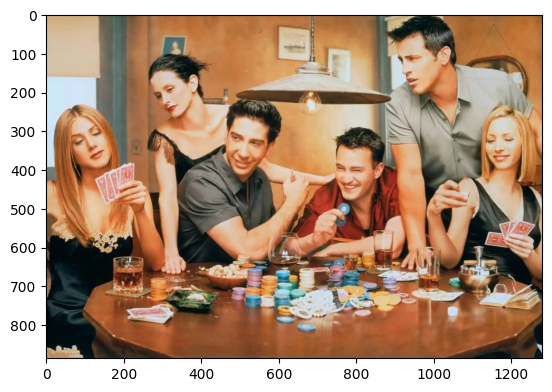

In [3]:
img =  ins_get_image('t1')
plt.imshow(img[:, :, ::-1])

In [4]:
faces = app.get(img)
print(faces[0].keys())

d:\faceSwap\insight\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])


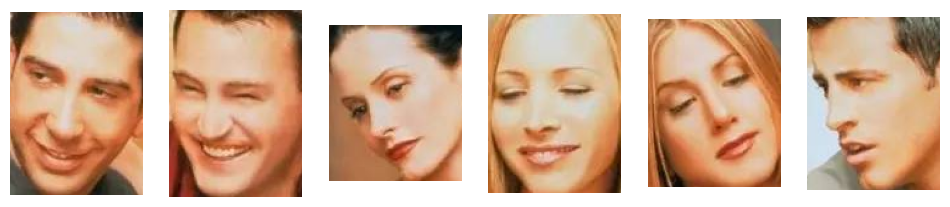

In [5]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))
for i,face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis('off')

(-0.5, 106.5, 146.5, -0.5)

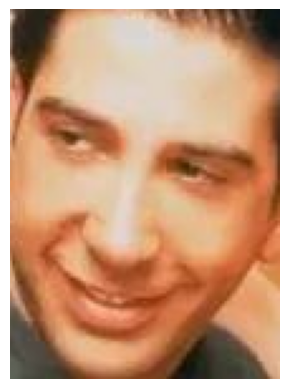

In [6]:
source  = faces[0]
bbox = source['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.axis('off')

# Swapper model

In [7]:
swapper = insightface.model_zoo.get_model('model_zoo\inswapper_128.onnx', download=False)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [8]:
res = img.copy()
for face in faces:
    res = swapper.get(res,face,source,paste_back=True)

(-0.5, 1279.5, 885.5, -0.5)

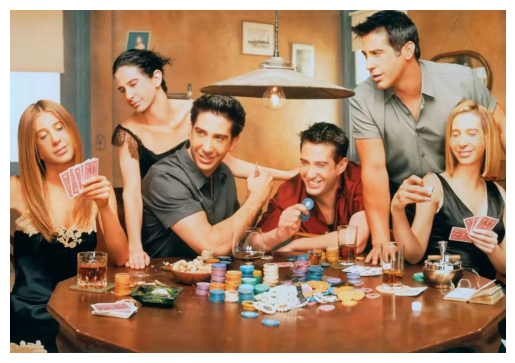

In [9]:
plt.imshow(res[:,:,::-1])
plt.axis('off')

# Swapping with my own face

(-0.5, 577.5, 591.5, -0.5)

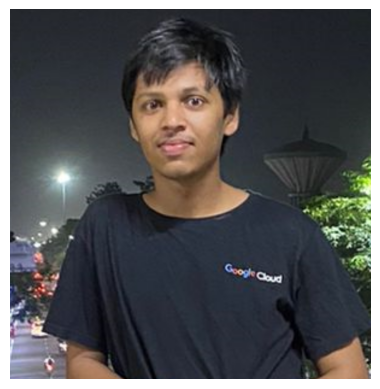

In [10]:
me = cv2.imread('img.png')
plt.imshow(me[:,:,::-1])
plt.axis('off')

In [13]:
me_faces = app.get(me)
me_face = me_faces[0]

res2 = img.copy()
for face in faces:
    res2 = swapper.get(res2,face,me_face,paste_back=True)


(-0.5, 1279.5, 885.5, -0.5)

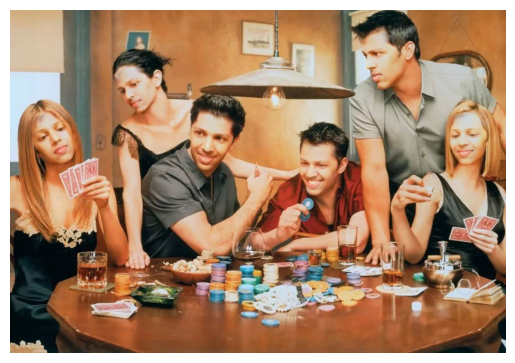

In [14]:
plt.imshow(res2[:,:,::-1])
plt.axis('off')

# Face swapping in one go
---

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_ex

(-0.5, 1279.5, 719.5, -0.5)

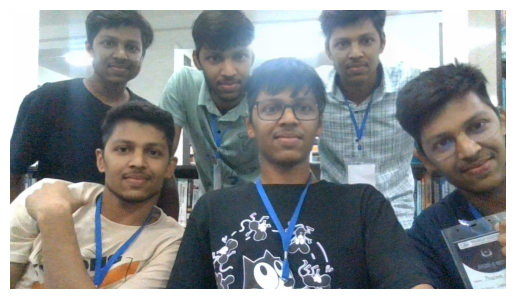

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
swapper = insightface.model_zoo.get_model('model_zoo\inswapper_128.onnx', download=False)
app = FaceAnalysis(name='buffalo_l')

input_img = cv2.imread('img.jpg')
replace_with_img = cv2.imread('img2.png')
# plt.imshow(input_img[:,:,::-1])

app.prepare(ctx_id=0, det_size=(1280, 1280))
faces = app.get(input_img)


source = app.get(replace_with_img)[0]
res = input_img.copy()
for face in faces:
    res = swapper.get(res,face,source,paste_back=True)

plt.imshow(res[:,:,::-1])
plt.axis('off')
